# An Analysis of Soccer Players' Wages and their FIFA 19 Ratings
Author: Soumith Gadila
## Introduction
The better you are at your job, the more you typically get paid. The purpose of this project is to examine how well this applies in professional soccer.
Specifically, I will be examining the top 500 rated players in FIFA 19 (EA Sports' soccer video game) and how much these players are paid in real life.

## Outline



1.   Obtaining Data
2.   EDA - Taking a Look at the Top 500 Players
3.   EDA - Wages in Top 500
4.   Introductory Analysis of Wage vs Rating
5.   Machine Learning: Linear Regression (Multiple Variables)
6.   Machine Learning: Linear Regression (One Variable)
7.   Conclusion

## Obtaining Data
The dataset in this project was obtained from Kaggle, linked [here](https://www.kaggle.com/karangadiya/fifa19/version/4). It has a variety of statistics for every player in the FIFA 19 video game database. As a quick primer, FIFA 19 is a soccer video game with professional teams and their players. A player is given an overall score/rating out of 100 based on how good they are (higher means better), and there are also other stats such as shooting, defending, etc. This dataset includes a player's overall ranking, ratings for a variety of attributes, wage they make in real life, and more.

We will start by loading the data (from a downloaded .csv file), and taking a look at the formatting/what is contained. But first, we need some imports.

In [126]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Now that we have the packages we need, we can carry on with getting the data.

In [127]:
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Now, we will drop some data that does not seem useful for the sake of our analysis. This includes the 'ID', club logo, and other seemingly worthless qualitative data (at least in the context of this analysis). We will also drop some quantitative data (such as the positional data for LS, ST, RS, etc., since there is already a position column so the extra data seems like overkill to have.

In [128]:
df.drop(labels = ['ID', 'Photo', 'Club Logo', 'Flag', 'Special', 'Work Rate', 
                  'Body Type', 'Real Face', 'Joined', 'Loaned From', 
                  'Contract Valid Until', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 
                  'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 
                  'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 
                  'RCB', 'RB', 'Jersey Number', 'Unnamed: 0'], 
        axis = 1, inplace = True)
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,RF,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,ST,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,LW,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,GK,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,RCM,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Now that the data is a bit more clean, we can go ahead and get the top 500 rated players. Lucky for us, the data is already sorted by rating (the 'Overall' column), so getting the top 500 is rather easy. 

In [129]:
top_500 = df.head(500)
top_500.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,RF,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,ST,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,LW,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,GK,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,RCM,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Taking a Look at the Top 500 Players

Now that we have the top 500 players in FIFA, we will explore how these players are distributed via a variety of methods. First, I will create distribution tables of the top 500 players by position and then further this analysis by classifying the positions into goalie, defense, midfield, and attack.


In [130]:
# distribution table of number of players in top 500 by position
top_500['Position'].value_counts()

GK     57
ST     39
LM     33
CAM    32
RM     30
RCB    29
CB     29
LCB    28
CM     26
LB     24
RB     23
LCM    20
RW     19
CDM    19
RCM    19
LS     16
LDM    11
LW     10
RS     10
RDM     8
CF      5
LF      4
LAM     2
RWB     2
RAM     2
RF      2
LWB     1
Name: Position, dtype: int64

Let's also create a frequency plot for this data by using seaborn.

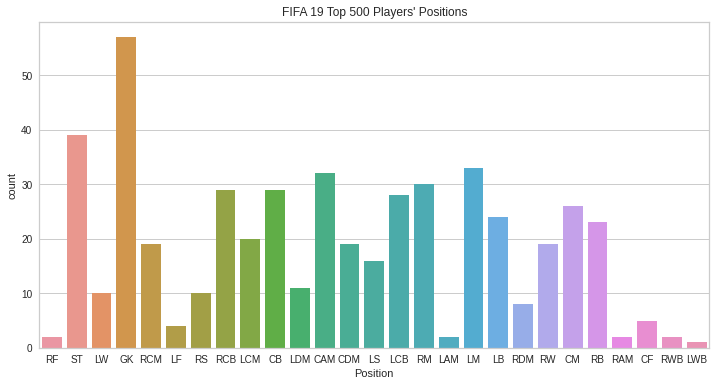

In [131]:
plt.figure(figsize = (12,6))
plt.title('FIFA 19 Top 500 Players\' Positions')
sns.countplot(x = 'Position', data = top_500)
plt.show()

As we can see above, goalkeepers are by far the most prevalent in the top 500 list (57 of them), with strikers coming in at second with 39, and left midfielders at 33. To get a sense of what these positions represent and their approximate location on a soccer pitch, please take a look at this [link](http://sportsgiz.com/football/wp-content/uploads/sites/2/2018/06/Football-Pitch-Player-Soccerl-Field-Position-Names-Abbreviations-Logfact.png). It makes sense that goalies top the list, as there is only one goalie per team, so they need to be really good to even be on the team.

Moving on, we will now categorize these positions into classes of goalie, defender, midfielder, or attacker, and then create a frequency plot of the top 500 players by these classes. To do so, first we need to create the class groupings.

In [132]:
# creating classes
goalie = ['GK']
defense = ['RCB', 'CB', 'LCB', 'LB', 'RB', 'RWB', 'LWB']
midfield = ['LM', 'CAM', 'RM', 'CM', 'LCM', 'CDM', 'RCM', 'LDM', 'RDM', 
            'LAM', 'RAM']
attack = ['ST', 'RW', 'LS', 'RS', 'LW', 'CF', 'LF', 'RF']


Now, we will create a copy of the top_500 dataframe and add a new column to this, "Position Class", which indicates what class each of the players belong to. We can do this by doing the following: For each player, check their "Position" and determine which position class (created above) that "Position" belongs in.

In [133]:
t500_class = top_500.copy()

t500_class.loc[t500_class.Position.isin(goalie), 'Position Class'] = 'Goalie'
t500_class.loc[t500_class.Position.isin(defense), 'Position Class'] = 'Defense'
t500_class.loc[t500_class.Position.isin(midfield), 'Position Class']='Midfield'
t500_class.loc[t500_class.Position.isin(attack), 'Position Class'] = 'Attack'

t500_class.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Position Class
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,RF,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,Attack
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,ST,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,Attack
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,LW,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,Attack
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,GK,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,Goalie
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,RCM,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,Midfield
5,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,Right,4.0,4.0,4.0,LF,5'8,163lbs,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M,Attack
6,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,€420K,Right,4.0,4.0,4.0,RCM,5'8,146lbs,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M,Midfield
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,€455K,Right,5.0,4.0,3.0,RS,6'0,190lbs,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M,Attack
8,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,€380K,Right,4.0,3.0,3.0,RCB,6'0,181lbs,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M,Defense
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,€94K,Right,3.0,3.0,1.0,GK,6'2,192lbs,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,60.0,67.0,86.0,49.0,22.0,76.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M,Goalie


Now that we have the players categorized into their position classes, we can go ahead and make the frequency plot by using seaborn.

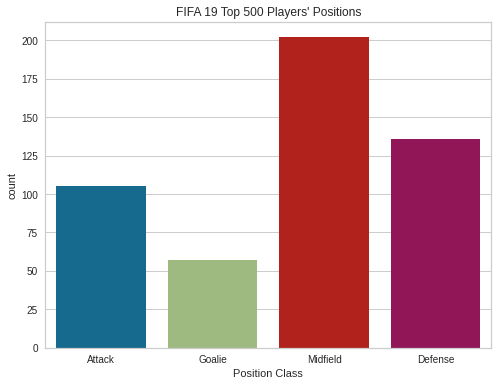

In [134]:
plt.figure(figsize = (8,6))
plt.title('FIFA 19 Top 500 Players\' Positions')
sns.countplot(x = 'Position Class', data = t500_class)
plt.show()

Let's also make a pie chart to get a sense of the relative frequencies.

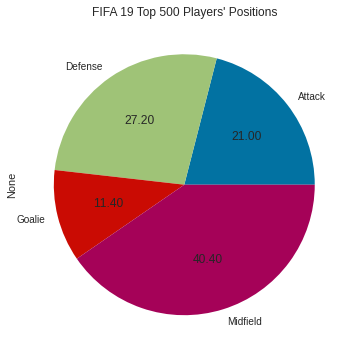

In [135]:
plt.figure(figsize = (8,6))
plt.title('FIFA 19 Top 500 Players\' Positions')
t500_class.groupby('Position Class').size().plot(kind='pie', autopct='%.2f')
plt.show()

From these graphs, we can see that midfield is the most represented in the top 500, followed by defense, then attack, and finally goalie. From a soccer standpoint, this does make sense. In a typical squad of size 11, there are usually 4-6 midfielders, 3-4 defenders, 2-3 attackers, and 1 goalie (obviously these numbers vary by team), so this ordering seen in the frequency plot is almost expected just by statistics. The plurality of players in a team are midfielders, so it would make sense that the plurality of players in the top 500 are midfielders.

## Wages in Top 500

Moving on, we will now explore the wages of players in the top 500. The wages given are in the units of thousands of euros/week. First off, we will get descriptive stats for the wages.

In [136]:
t500_class['Wage'].describe()

count       500
unique      134
top       €115K
freq         16
Name: Wage, dtype: object

There is a problem...the wage is in the form of a string, so we can't get qualitative stats. We need to convert that into an integer representation if we wish to do more qualitative analysis. All the strings are of the form "€<number>K", so we simply need to parse the string for the number and multiply by 1000 to get the numeric representation. We will do this through the use of a lambda function.

In [137]:
t500_class['Wage'] = t500_class.apply(lambda row: 
                                      int(row['Wage'].replace("€","")
                                      .replace("K",""))*1000, axis = 1)
t500_class.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Position Class
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,565000,Left,5.0,4.0,4.0,RF,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,Attack
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,405000,Right,5.0,4.0,5.0,ST,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,Attack
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,290000,Right,5.0,5.0,5.0,LW,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,Attack
3,De Gea,27,Spain,91,93,Manchester United,€72M,260000,Right,4.0,3.0,1.0,GK,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,Goalie
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,355000,Right,4.0,5.0,4.0,RCM,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,Midfield


Now, let's try to get the descriptive stats again...

In [138]:
t500_class['Wage'].describe()

count       500.000000
mean      93192.000000
std       76441.806858
min           0.000000
25%       40000.000000
50%       73000.000000
75%      125000.000000
max      565000.000000
Name: Wage, dtype: float64

Much better! We can see that the average wage a player in the top 500 of FIFA 19 is paid is about 93,192 euros per week. The highest wage is 565,000 for Lionel Messi, as is expected as he is arguably the greatest of this generation and plays for FC Barcelona, a major football club in Spain. It's interesting that the minimum value of wage is 0. Let's see where that came from..

In [139]:
t500_class.loc[t500_class.Wage == 0]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Position Class
452,L. Paredes,24,Argentina,80,85,NaN,€0,0,Right,2.0,4.0,4.0,CM,5'11,165lbs,76.0,55.0,60.0,84.0,73.0,78.0,79.0,78.0,82.0,82.0,75.0,69.0,77.0,74.0,77.0,82.0,61.0,79.0,69.0,80.0,79.0,72.0,74.0,82.0,57.0,74.0,73.0,75.0,72.0,9.0,14.0,6.0,9.0,10.0,NaN,Midfield


Well, it appears that this player was teamless at the point this FIFA 19 dataset was being made (as seen by not having a club value), so it makes sense that he was not being paid anything. Since this may affect further analysis, we shall drop this data point from the data frame.

In [140]:
t500_class.drop(452, inplace = True)

Now, let's move on and see the entire distribution of wages.

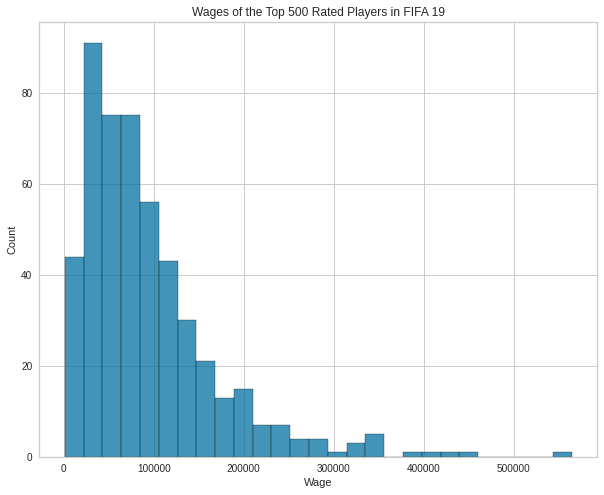

In [141]:
plt.figure(figsize = (10,8))
plt.title('Wages of the Top 500 Rated Players in FIFA 19')
sns.histplot(data = t500_class, x = 'Wage')
plt.show()

It appears as though the median wage for the top 500 players in FIFA 19 is around 100k. Most of the wages seem to be on the lower end of the spectrum (0-100k), with only a select few making over 250k/week. This is about what I expected, as there are some special players who make a lot of money in every sport. Now, we will see how the distributions of the wages of the top 500 rated players differ by position class, by making separate histograms for goalies, defenders, midfielders, and attackers.

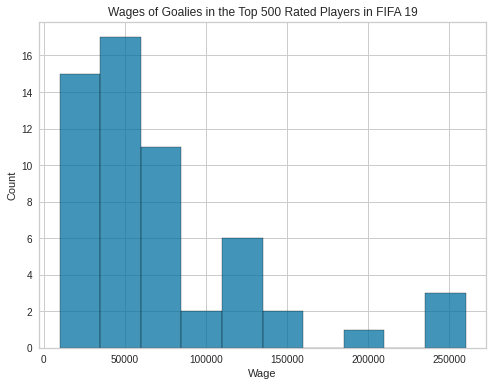

In [142]:
plt.figure(figsize = (8,6))
plt.title('Wages of Goalies in the Top 500 Rated Players in FIFA 19')
sns.histplot(data = t500_class.loc[t500_class.Position.isin(goalie)], 
             x = 'Wage')
plt.show()

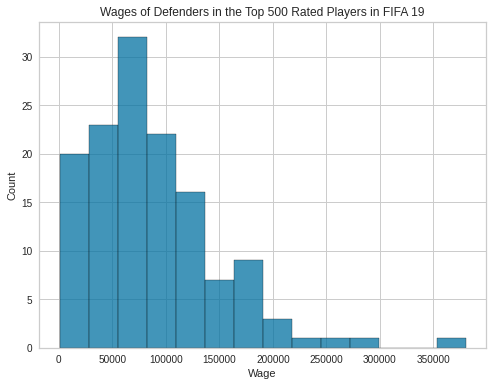

In [143]:
plt.figure(figsize = (8,6))
plt.title('Wages of Defenders in the Top 500 Rated Players in FIFA 19')
sns.histplot(data = t500_class.loc[t500_class.Position.isin(defense)], 
             x = 'Wage')
plt.show()

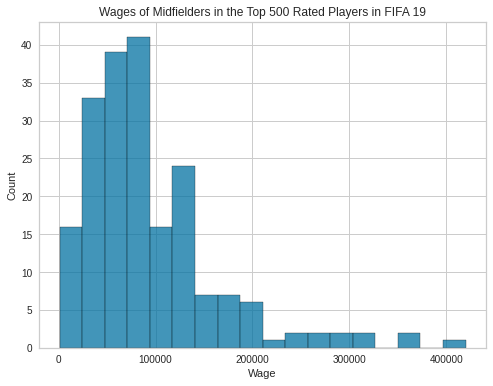

In [144]:
plt.figure(figsize = (8,6))
plt.title('Wages of Midfielders in the Top 500 Rated Players in FIFA 19')
sns.histplot(data = t500_class.loc[t500_class.Position.isin(midfield)], 
             x = 'Wage')
plt.show()

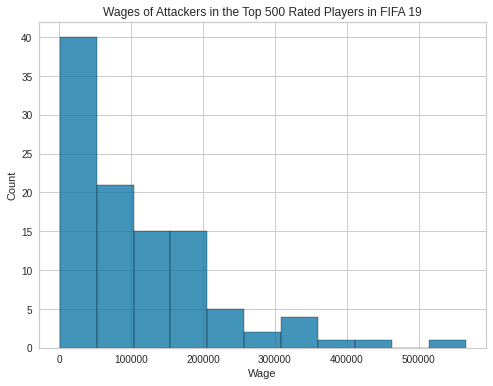

In [145]:
plt.figure(figsize = (8,6))
plt.title('Wages of Attackers in the Top 500 Rated Players in FIFA 19')
sns.histplot(data = t500_class.loc[t500_class.Position.isin(attack)], 
             x = 'Wage')
plt.show()

As we can see from the histograms, most goalies seem to be having a lower wage than other positions. The wage distributions of defenders and midfielders seem to be similar (both having a median around 75k or so). A lot of attackers seem to be making sub 50k per week, but at the same time, the highest paid players in the top 500 seem to mostly be attackers. For all the positions, the frequency plot seems to be skewed right, with the majority of the data points being clustered closer to 100k.

## Introductory Analysis of Wage vs Rating
 
In this section, we will begin our analysis of wage as compared to rating and another statistics. First, we will create a simple scatter plot of wage vs rating. I have a feeling that higher rated players will be paid more, so let's explore that feeling further.

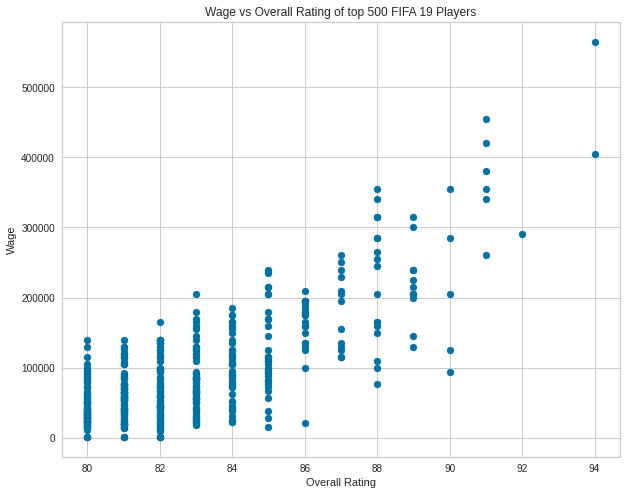

In [146]:
plt.figure(figsize = (10,8))
plt.title('Wage vs Overall Rating of top 500 FIFA 19 Players')
plt.xlabel('Overall Rating')
plt.ylabel('Wage')
plt.scatter(x = t500_class['Overall'], y = t500_class['Wage'])
plt.show()

It appears as though higher rated players do tend to get paid more, which makes sense as better players will be more valuable to their teams. However, there is also a lot of variation in wages for each rating point, which I did not expect.

Now, we are interested in how wages are correlated to other statistics given by this FIFA 19 dataset. We begin by listing all the variables given in the data set.

In [147]:
list(t500_class) 

['Name',
 'Age',
 'Nationality',
 'Overall',
 'Potential',
 'Club',
 'Value',
 'Wage',
 'Preferred Foot',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Position',
 'Height',
 'Weight',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes',
 'Release Clause',
 'Position Class']

Since obviously different positions will have differing stats (for example, attackers will have better shooting while goal keepers will have better GK stats), I'm only interested in the stats that seem extremely relevant to every position. These are "age", "overall", "international reputation", "reactions", "positioning", "agility", "stamina", "vision", and "composure". The other variables have too much variance between positions as explained previously. Let's create a new data frame with these values.

In [148]:
new_df = t500_class[['Name', 'Wage', 'Age', 'Overall', 
                     'International Reputation', 'Reactions', 'Positioning', 
                     'Agility', 'Stamina', 'Vision', 'Composure']]
new_df.head()

,Name,Wage,Age,Overall,International Reputation,Reactions,Positioning,Agility,Stamina,Vision,Composure
0,L. Messi,565000,31,94,5.0,95.0,94.0,91.0,72.0,94.0,96.0
1,Cristiano Ronaldo,405000,33,94,5.0,96.0,95.0,87.0,88.0,82.0,95.0
2,Neymar Jr,290000,26,92,5.0,94.0,89.0,96.0,81.0,87.0,94.0
3,De Gea,260000,27,91,4.0,90.0,12.0,60.0,43.0,68.0,68.0
4,K. De Bruyne,355000,27,91,4.0,91.0,87.0,79.0,90.0,94.0,88.0


Now that we have this data frame, we can look at how closely these statistics are correlated to wage. We will begin by creating a correlation matrix.

In [149]:
corr_mat = new_df.corr()
corr_mat

,Wage,Age,Overall,International Reputation,Reactions,Positioning,Agility,Stamina,Vision,Composure
Wage,1.000000,0.065301,0.769962,0.533769,0.556684,0.181662,0.191616,0.161699,0.231238,0.374606
Age,0.065301,1.000000,0.225764,0.428988,0.124374,-0.121397,-0.196306,-0.199609,-0.065784,0.100522
Overall,0.769962,0.225764,1.000000,0.630909,0.682322,0.043636,0.089174,0.010338,0.125476,0.364459
International Reputation,0.533769,0.428988,0.630909,1.000000,0.416058,0.106103,0.109332,0.019514,0.176889,0.373990
Reactions,0.556684,0.124374,0.682322,0.416058,1.000000,0.287414,0.232134,0.203773,0.286338,0.435472
Positioning,0.181662,-0.121397,0.043636,0.106103,0.287414,1.000000,0.717229,0.728871,0.779050,0.624987
Agility,0.191616,-0.196306,0.089174,0.109332,0.232134,0.717229,1.000000,0.522369,0.666864,0.447083
Stamina,0.161699,-0.199609,0.010338,0.019514,0.203773,0.728871,0.522369,1.000000,0.527611,0.603187
Vision,0.231238,-0.065784,0.125476,0.176889,0.286338,0.779050,0.666864,0.527611,1.000000,0.559319
Composure,0.374606,0.100522,0.364459,0.373990,0.435472,0.624987,0.447083,0.603187,0.559319,1.000000


We can make this correlation more aesthetically pleasing and easier to intepret by morphing it into a heatmap through the use of seaborn.

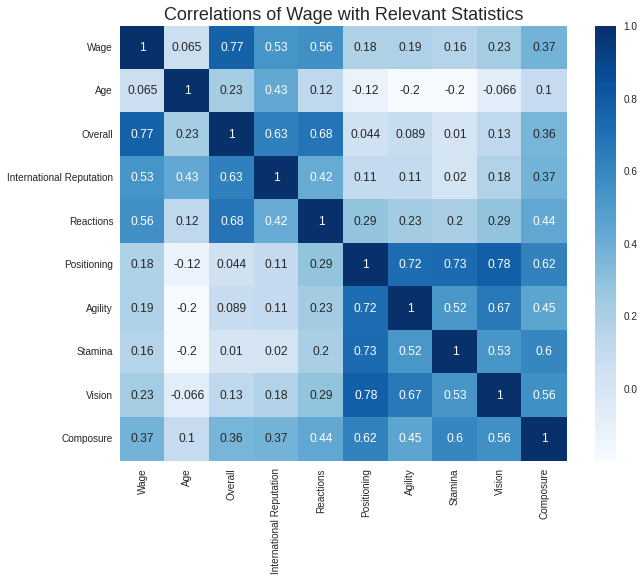

In [150]:
plt.figure(figsize = (10,8))
plt.title("Correlations of Wage with Relevant Statistics", fontsize=18)
sns.heatmap(corr_mat, cmap = 'Blues', annot=True)
plt.show()

We can see that overall, international reputation, reactions, composure, and vision are the most correlated with wage. It's interesting that age has virtually no correlation with wage. Another interesting note: age has negative correlation with agility and stamina, meaning that older players are less agile and have less stamina, which makes sense.

## Machine Learning: Linear Regression (Multiple Variables)
Now that we have a better understanding of what variables are correlated with wage, let's see how well we can predict a given player's wage based on their statistics. We will create a machine learning model, specifically linear regression, based on the data we have, with the intention to create a linear model that can accurately predict the wage of a new, unseen player. First, we must see if these variables have a statistical relationship with wage.

We start by splitting the data into x (predictor variables) and y (target). Our null hypothesis (H_0) is that none of these predictor variables have a statistically significant relationship with the target (wage). Our alternative hypothesis (H_1) is that at least one of the predictor variables has a significant relationship with the target.

In [151]:
x = new_df[['Overall', 'International Reputation', 'Reactions', 'Composure', 
            'Vision']]
y = new_df['Wage']

We now must find a linear regression model that fits this data well.

In [152]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

We can get the explicit linear model by doing the following:

In [153]:
# get the coefficients and y-intercept given by the model
coef = reg.coef_.tolist()
intercept = reg.intercept_
# list of predictor vars (index matches up with the coef list)
predictors = ['Overall', 'International Reputation', 'Reactions', 
              'Composure', 'Vision']
model = "Wage = "
# get the coefficient for each predictor var and add it to the model
for i in range(len(coef)):
  model += str(coef[i]) + "*" + predictors[i] + " + "
model += str(intercept)
print(model)

Wage = 20060.36356582974*Overall + 4713.246819595185*International Reputation + 120.42463450109699*Reactions + 282.42461720013944*Composure + 648.0803192705505*Vision + -1659181.8192688425


Now we have the model for the top 500 players! To test the null hypothesis we made earlier, we need to look at some statistics. We need the statsmodel package to do this, and we'll use the OLS method to get our p-values (more information [here](https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression) and [here](https://www.xlstat.com/en/solutions/features/ordinary-least-squares-regression-ols#:~:text=Ordinary%20Least%20Squares%20regression%20(OLS)%20is%20a%20common%20technique%20for,minimum%20squares%20error%20(SSE).))

In [154]:
import statsmodels.api as sm
X2 = sm.add_constant(x)
ols = sm.OLS(y, X2)
ols2 = ols.fit()
print(ols2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     156.8
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           1.91e-99
Time:                        00:03:27   Log-Likelihood:                -6080.8
No. Observations:                 499   AIC:                         1.217e+04
Df Residuals:                     493   BIC:                         1.220e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

It appears that the overall, vision, and constant (y-intercept) p-values are much lower than 0.05, so they are statistically significant. Therefore, we reject the null hypothesis. We have strong evidence that suggests that these variables have a statistically significant relationship with wage, which means this linear regression is meaningful.

Now, let's try some machine learning. We need to split this data into training and testing sets. We will fit a model to the training set, and then test the performance of the model on the training set. For the sake of this project, we choose to split it as 80% test and 20% training. This is fairly common in data science, but some may use a 70:30 or even a 50:50 split. Here is a [link](https://www.baeldung.com/cs/train-test-datasets-ratio) to read more about the splits.

In [155]:
# split data into training/testing and intialize linear regressor
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
reg = LinearRegression()

# fit the model to the training data
reg.fit(X_train, y_train)

# get predictions on testing data
y_pred = reg.predict(X_test)

Let's see how accurate the model is on both the training and testing sets.

In [156]:
print("Accuracy/R^2 on training data: " + str(reg.score(X_train, y_train)))
print("Accuracy/R^2 on testing data: " + str(reg.score(X_test, y_test)))

Accuracy/R^2 on training data: 0.5943768458853438
Accuracy/R^2 on testing data: 0.6586062849727632


Well, this isn't outstanding but I wouldn't say it's terrible accuracy. The predictor variables don't have extremely strong correlation with wage, so it makes sense that we don't get amazing accuracy in the model. Let's also look at the residuals plot of the model (plot of the difference between observed value of the target and the predicted value). In other words, it's a graph of the errors.

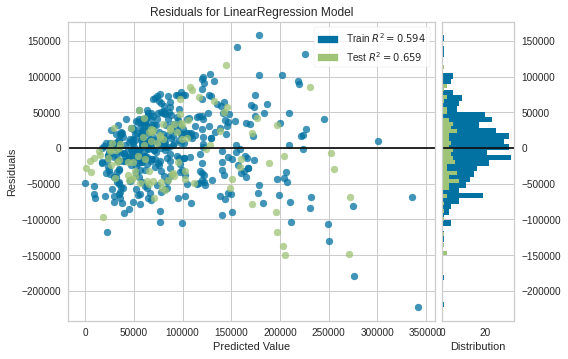

In [157]:
from yellowbrick.regressor import ResidualsPlot
model = LinearRegression()
resid = ResidualsPlot(model)
resid.fit(X_train, y_train)
resid.score(X_test, y_test)
resid.show()

The residual plot seems to be fairly symmetrical for the lower end of predictions, but the model doesn't seem to perform as well as the predicted values of wages get higher.

## Machine Learning: Linear Regression (One Variable)
Now, let's try a linear regression again, but this time let's just use the "Overall" variable and see how well that works.

In [158]:
x = new_df[['Overall']]
y = new_df['Wage']
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

Let's output the model.

In [159]:
# get the coefficient and y-intercept given by the model
coef = reg.coef_
intercept = reg.intercept_
model = "Wage = " + str(coef[0]) + "*Overall"  + " " + str(intercept)
print(model)

Wage = 21878.4061321789*Overall -1720468.259896275


The model predicts that for each increase of 1 Overall rating, a player's wage will increase by approximately 21878 euros/week. Let's again do some machine learning by splitting the data into training and testing, and then evaluating the accuracy of this new model.

In [160]:
# split data into training/testing and intialize linear regressor
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
reg = LinearRegression()

# fit the model to the training data
reg.fit(X_train, y_train)

# get predictions on testing data
y_pred = reg.predict(X_test)

print("Accuracy/R^2 on training data: " + str(reg.score(X_train, y_train)))
print("Accuracy/R^2 on testing data: " + str(reg.score(X_test, y_test)))

Accuracy/R^2 on training data: 0.6013059876563944
Accuracy/R^2 on testing data: 0.5456039949789315


It appears as though the accuracy on the training data is close to before, but the accuracy on the testing data is much worse than before. The other variables being used definitely helped out the model. Just using rating as a predictor of wage clearly isn't good enough. Let's plot the the line corresponding to the model along with the actual data points for the testing set.

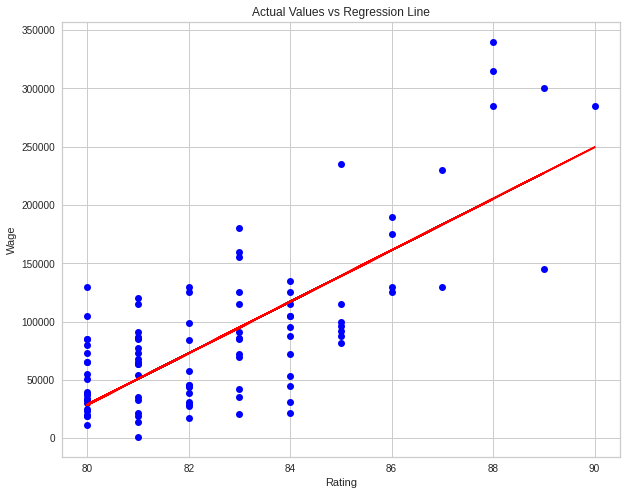

In [161]:
plt.figure(figsize = (10,8))
plt.plot(X_test, y_test, 'o', color = 'blue') # actual values of testing set
plt.plot(X_test, y_pred, color = 'red')
plt.title('Actual Values vs Regression Line')
plt.xlabel('Rating')
plt.ylabel('Wage')
plt.show()

As we can see, the actual values are not closely distributed along the regression line. Maybe having a larger data set would reduce some of this variance and the regression line would fit the data better.

## Conclusion


Before doing this project, I expected that the higher a player is rated on FIFA, the more they are paid. From the analysis conducted, this is true in general. However, the relationship is definitely not as linear as I expected. I thought that the distribution of wages would be pretty narrow for each rating, but as we can see from the scatter plots, this was not the case. In hindsight, this does make sense as there are many factors going into how much a player makes, such as what club they play for (some clubs can afford higher salaries than others).

In the future, it might be a good idea to try to somehow incorporate factors such as that into the model. Both the linear regression models' accuracies definitely could be better, and using different predictor variables could yield much better results.

One thing that I found interesting that I made a note of was that age had virtually no correlation with wage. From a soccer standpoint, I guess this makes sense because if you just look at the top 500 players, 2 players of different ages will probably make roughly the same amount of money if they are the exact same age, because they are both just as good at their job.

Overall, this project showed me that a soccer player's skill isn't the sole determinant of wage. There are other factors, some outside of the player's control (such as club financial status), that affect their salary. My next steps with this would be to expand the dataset (ideally find a good FIFA 22 dataset as that is the most applicable to today), and somehow try to incorporate qualitative variables into my machine learning models.